In [1]:
import pandas as pd
import numpy as np
import datetime

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
def analisis_data(df, kolomkor=None):
    tipe = df.dtypes
    missing_val = df.apply(lambda x: x.isnull().sum())
    unique = df.apply(lambda x: [x.unique()])
    counts = df.apply(lambda x: x.count())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ df.shape[0]) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    
    print('Data shape:', df.shape)
    
    if kolomkor is None:
        cols = ['tipe', 'counts', 'distincts', 'missing_val', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([tipe, counts, distincts, missing_val, missing_ratio, unique, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[kolomkor]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + kolomkor
        cols = ['tipe', 'counts', 'distincts', 'missing_val', 'missing ratio', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    return str

In [6]:
analisis_data(df)

Data shape: (541909, 8)


tipe  counts  distincts  missing_val  missing ratio  \
Country              object  541909         38            0       0.000000   
CustomerID          float64  406829       4373       135080      24.926694   
Description          object  540455       4224         1454       0.268311   
InvoiceDate  datetime64[ns]  541909      23260            0       0.000000   
InvoiceNo            object  541909      25900            0       0.000000   
Quantity              int64  541909        722            0       0.000000   
StockCode            object  541909       4070            0       0.000000   
UnitPrice           float64  541909       1630            0       0.000000   

                                                       uniques    skewness  \
Country      [[United Kingdom, France, Australia, Netherlan...         NaN   
CustomerID   [[17850.0, 13047.0, 12583.0, 13748.0, 15100.0,...    0.029835   
Description  [[WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...         NaN   
InvoiceDate  [[2010-12-01 08:26:00, 2010-12-01 08:28:00, 20...         NaN   
InvoiceNo    [[536365, 536366, 536367, 536368, 536369, 5363...         NaN   
Quantity     [[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 8...   -0.264076   
StockCode    [[85123A, 71053, 84406B, 84029G, 84029E, 22752...         NaN   
UnitPrice    [[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2....  186.506972   

                  kurtosis  
Country                NaN  
CustomerID       -1.179982  
Description            NaN  
InvoiceDate            NaN  
InvoiceNo              NaN  
Quantity     119769.160031  
StockCode              NaN  
UnitPrice     59005.719097

In [7]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [8]:
df.describe(exclude=np.number)

InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
first         NaN       NaN                                 NaN   
last          NaN       NaN                                 NaN   

                InvoiceDate         Country  
count                541909          541909  
unique                23260              38  
top     2011-10-31 14:41:00  United Kingdom  
freq                   1114          495478  
first   2010-12-01 08:26:00             NaN  
last    2011-12-09 12:50:00             NaN

In [9]:
print('The number of data with negative quantity and price: ', df[(df.Quantity<0)&(df.UnitPrice<0)].shape[0])

The number of data with negative quantity and price:  0


In [10]:
# if none, check if there is value where quantity 0 and price negative and vice versa
print('The number of data with negative quantity and zero price: ', df[(df.Quantity<0)&(df.UnitPrice==0)].shape[0])
print('The number of data with zero quantity and negative price: ', df[(df.Quantity==0)&(df.UnitPrice<0)].shape[0])

The number of data with negative quantity and zero price:  1336
The number of data with zero quantity and negative price:  0


In [11]:
#check the data
df[(df.Quantity<0)&(df.UnitPrice==0)].head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
2406    536589     21777         NaN       -10 2010-12-01 16:50:00        0.0   
4347    536764    84952C         NaN       -38 2010-12-02 14:42:00        0.0   
7188    536996     22712         NaN       -20 2010-12-03 15:30:00        0.0   
7189    536997     22028         NaN       -20 2010-12-03 15:30:00        0.0   
7190    536998     85067         NaN        -6 2010-12-03 15:30:00        0.0   

      CustomerID         Country  
2406         NaN  United Kingdom  
4347         NaN  United Kingdom  
7188         NaN  United Kingdom  
7189         NaN  United Kingdom  
7190         NaN  United Kingdom

In [42]:
#looks like the description and customerid contains nan value
#lets check if it is all NaN
a = df[df.UnitPrice==0][['Description', 'CustomerID']]
print('Percentage of non-NaN values with negative quantity in column \nDescription: {:1.2f}% \nCustomerID: {:1.0f}%'.format(a['Description'].isnull().sum()/a.shape[0]*100,a['CustomerID'].isnull().sum()/a.shape[0]*100))

Percentage of non-NaN values with negative quantity in column 
Description: nan% 
CustomerID: nan%


In [13]:
#for unit price, the description is available but again there are no customer ids

In [14]:
# all the customer id data is empty for negative quantity what about unit price?
d = df[(df.Quantity<0)&(df.UnitPrice==0)][['Description', 'CustomerID']]
print('Percentage of non-NaN values with negative quantity in column \nDescription: {:1.2f}% \nCustomerID: {:1.0f}%'.format(d['Description'].isnull().sum()/df.shape[0]*100,d['CustomerID'].isnull().sum()/df.shape[0]*100))

Percentage of non-NaN values with negative quantity in column 
Description: 0.16% 
CustomerID: 0%


In [15]:
df[(df.Quantity<0)&(df.UnitPrice==0)]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2406      536589     21777         NaN       -10 2010-12-01 16:50:00   
4347      536764    84952C         NaN       -38 2010-12-02 14:42:00   
7188      536996     22712         NaN       -20 2010-12-03 15:30:00   
7189      536997     22028         NaN       -20 2010-12-03 15:30:00   
7190      536998     85067         NaN        -6 2010-12-03 15:30:00   
...          ...       ...         ...       ...                 ...   
535333    581210     23395       check       -26 2011-12-07 18:36:00   
535335    581212     22578        lost     -1050 2011-12-07 18:38:00   
535336    581213     22576       check       -30 2011-12-07 18:38:00   
536908    581226     23090     missing      -338 2011-12-08 09:56:00   
538919    581422     23169     smashed      -235 2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  
2406          0.0         NaN  United Kingdom  
4347          0.0         NaN  United Kingdom  
7188          0.0         NaN  United Kingdom  
7189          0.0         NaN  United Kingdom  
7190          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535333        0.0         NaN  United Kingdom  
535335        0.0         NaN  United Kingdom  
535336        0.0         NaN  United Kingdom  
536908        0.0         NaN  United Kingdom  
538919        0.0         NaN  United Kingdom  

[1336 rows x 8 columns]

In [16]:
#Check the number of negative quantity
print('Number of negative quantity: {}\nPercentage from total data: {:1.2%}'.format(df[df.Quantity<0].shape[0],df[df.Quantity<0].shape[0]/df.shape[0]))

Number of negative quantity: 10624
Percentage from total data: 1.96%


In [17]:
df[df.Quantity<0][['CustomerID','InvoiceNo']]

CustomerID InvoiceNo
141        14527.0   C536379
154        15311.0   C536383
235        17548.0   C536391
236        17548.0   C536391
237        17548.0   C536391
...            ...       ...
540449     14397.0   C581490
541541     15498.0   C581499
541715     15311.0   C581568
541716     17315.0   C581569
541717     17315.0   C581569

[10624 rows x 2 columns]

In [18]:
#looks like the invoice numbers are preceded with C, lets check 
#lets extract only the first character of InvoiceNo
print('The first character in invoice number for negative quantity is \'{}\' '.format(df.loc[(df.Quantity<0) & ~(df.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique()[0]))

The first character in invoice number for negative quantity is 'C' 


In [19]:
#check for negative value in unit price
print('Sample data with negative Unit Price: \n',df[df.UnitPrice<0])

Sample data with negative Unit Price: 
        InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


### Data Cleaning

In [20]:
#Lets clean the data
#because all of the negative quantity and unit price doesnt have customer id embedded with them, lets drop it
#also, considering the importance of customer id un RFM analysis, we should drop all the rows that doesnt have customer id with them

df = df[~(df.CustomerID.isnull())]

In [21]:
#just to make sure, delete the data with negative quantity and unit price
df = df[df.Quantity>=0]
df = df[df.UnitPrice>0]

In [22]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[397884 rows x 8 columns]

In [23]:
df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[392692 rows x 8 columns]

In [26]:
df_desc = df.groupby(['StockCode','Description']).count().reset_index()
print(df_desc['StockCode'].value_counts()[df_desc['StockCode'].value_counts()>1].reset_index().head())

    index  StockCode
0   23236          4
1   23196          4
2   23535          3
3   22937          3
4  17107D          3


In [27]:
#looks like there is mispellings
df_desc[df_desc['StockCode'] == df_desc['StockCode'].value_counts()[df_desc['StockCode'].value_counts()>1]
      .reset_index()['index'][1]]['Description'].unique()

array(['LEAVES MAGNETIC  SHOPPING LIST',
       'RETO LEAVES MAGNETIC SHOPPING LIST',
       'RETRO LEAVES MAGNETIC NOTEPAD', 'VINTAGE LEAF MAGNETIC NOTEPAD'],
      dtype=object)

In [28]:
#since I am not going to use the description column for further analysis, I will leave it that way
#the data types still wrong, so lets change it
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')
df['Total_Payment'] = df['Quantity']*df['UnitPrice']

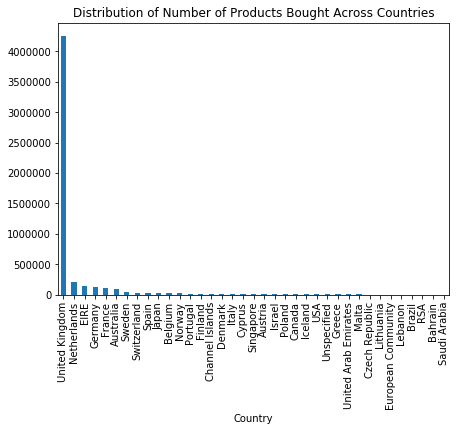

In [29]:
#Lets do a little bit of EDA
plt.figure(figsize=(7,5))
df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).plot(kind='bar', title='Distribution of Number of Products Bought Across Countries')
plt.show()

In [30]:
#customers from UK purchase the most as this online store is uk-based
#for further analysis, lets see the trend of sales across year

### RFM Clustering

In [31]:
# Create Recency Variable (Kekinian)
recent_date = max(df.InvoiceDate) + datetime.timedelta(days=1)
rfm=df.copy()
# Aggregate data
rfm = rfm.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Payment': 'sum'})

rfm.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Payment': 'MonetaryValue'}, inplace=True)

In [32]:
rfm.describe().transpose()

count         mean          std   min      25%      50%  \
Recency        4338.0    92.536422   100.014169  1.00   18.000   51.000   
Frequency      4338.0    91.720609   228.785094  1.00   17.000   41.000   
MonetaryValue  4338.0  2054.266460  8989.230441  3.75  307.415  674.485   

                   75%        max  
Recency         142.00     374.00  
Frequency       100.00    7847.00  
MonetaryValue  1661.74  280206.02

In [45]:
rfm

Recency  Frequency  MonetaryValue  Recency_log  Frequency_log  \
CustomerID                                                                  
12346           326          1       77183.60     5.786897       0.000000   
12347             2        182        4310.00     0.693147       5.204007   
12348            75         31        1797.24     4.317488       3.433987   
12349            19         73        1757.55     2.944439       4.290459   
12350           310         17         334.40     5.736572       2.833213   
...             ...        ...            ...          ...            ...   
18280           278         10         180.60     5.627621       2.302585   
18281           181          7          80.82     5.198497       1.945910   
18282             8         12         178.05     2.079442       2.484907   
18283             4        756        2094.88     1.386294       6.628041   
18287            43         70        1837.28     3.761200       4.248495   

            MonetaryValue_log  
CustomerID                     
12346               11.253942  
12347                8.368693  
12348                7.494007  
12349                7.471676  
12350                5.812338  
...                       ...  
18280                5.196285  
18281                4.392224  
18282                5.182064  
18283                7.647252  
18287                7.516041  

[4338 rows x 6 columns]

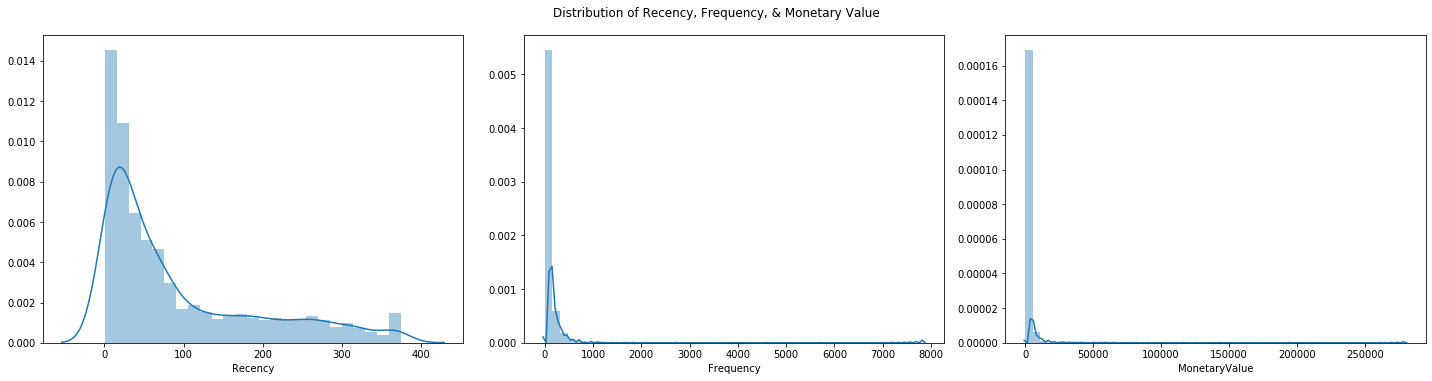

In [53]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Distribution of Recency, Frequency, & Monetary Value', y=1.05)
sns.distplot(rfm['Recency'], ax=axs[0])
sns.distplot(rfm['Frequency'],ax=axs[1])
sns.distplot(rfm['MonetaryValue'], ax=axs[2])
fig.tight_layout()

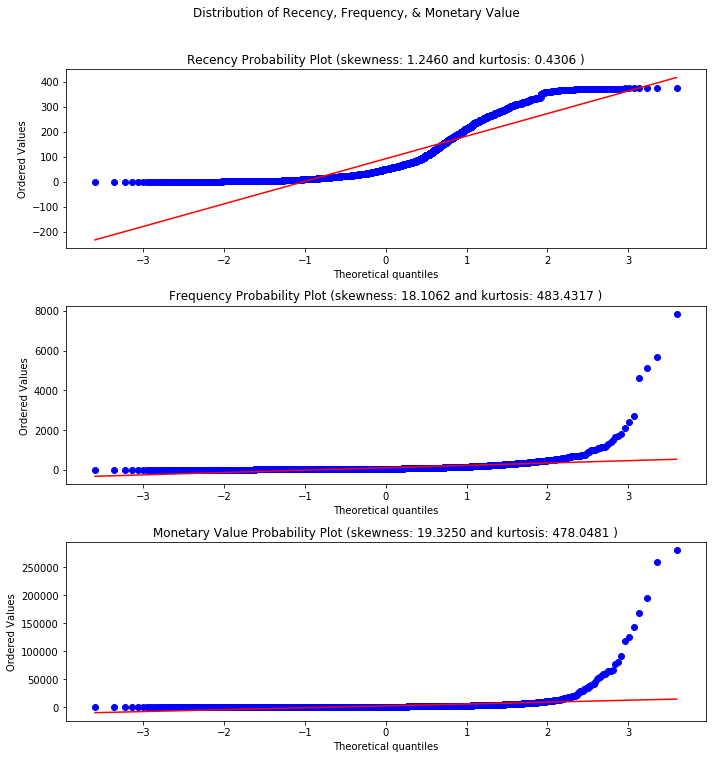

In [34]:
fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle('Distribution of Recency, Frequency, & Monetary Value', y=1.05)
probplot(rfm['Recency'], plot=axs[0])
probplot(rfm['Frequency'],plot=axs[1])
probplot(rfm['MonetaryValue'], plot=axs[2])
axs[0].title.set_text('Recency Probability Plot (skewness: {:.4f} and kurtosis: {:.4f} )'.format(rfm['Recency'].skew(), rfm['Recency'].kurt()))
axs[1].title.set_text('Frequency Probability Plot (skewness: {:.4f} and kurtosis: {:.4f} )'.format(rfm['Frequency'].skew(), rfm['Frequency'].kurt()))
axs[2].title.set_text('Monetary Value Probability Plot (skewness: {:.4f} and kurtosis: {:.4f} )'.format(rfm['MonetaryValue'].skew(), rfm['MonetaryValue'].kurt()))
fig.tight_layout()

In [35]:
rfm.reset_index()

CustomerID  Recency  Frequency  MonetaryValue
0          12346      326          1       77183.60
1          12347        2        182        4310.00
2          12348       75         31        1797.24
3          12349       19         73        1757.55
4          12350      310         17         334.40
...          ...      ...        ...            ...
4333       18280      278         10         180.60
4334       18281      181          7          80.82
4335       18282        8         12         178.05
4336       18283        4        756        2094.88
4337       18287       43         70        1837.28

[4338 rows x 4 columns]

### Transforming Data

In [36]:
rfm['Recency_log'] = np.log(rfm['Recency'])
rfm['Frequency_log'] = np.log(rfm['Frequency'])
rfm['MonetaryValue_log'] = np.log(rfm['MonetaryValue'])

In [37]:
feature_transformed = rfm[['Recency_log','Frequency_log', 'MonetaryValue_log']] 
feature_scaled = preprocessing.StandardScaler().fit_transform(feature_transformed)
pd.DataFrame(feature_scaled, columns=feature_transformed.columns).describe().T

count          mean       std       min       25%  \
Recency_log        4338.0 -1.027980e-16  1.000115 -2.630445 -0.612424   
Frequency_log      4338.0  3.672591e-18  1.000115 -2.775160 -0.638433   
MonetaryValue_log  4338.0 -1.202102e-16  1.000115 -4.179280 -0.684183   

                        50%       75%       max  
Recency_log        0.114707  0.829652  1.505796  
Frequency_log      0.025507  0.697925  3.988157  
MonetaryValue_log -0.060942  0.654244  4.721395

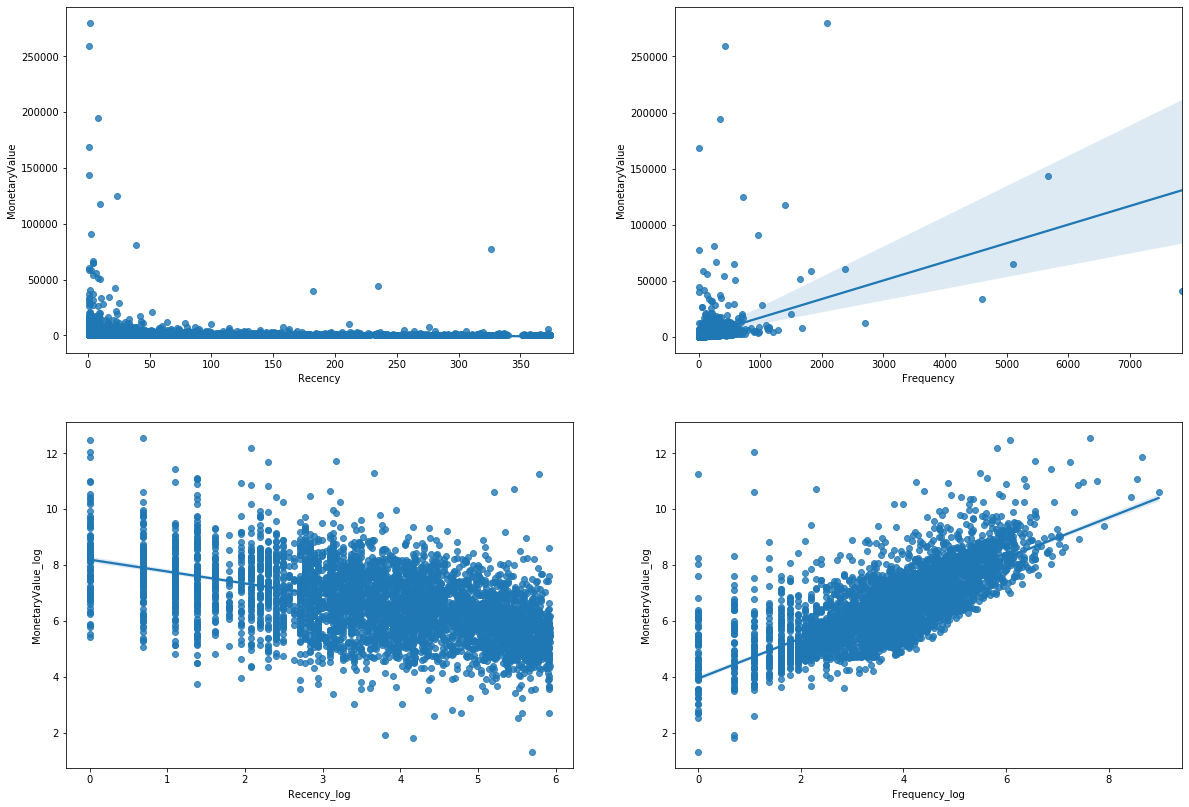

In [38]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='MonetaryValue', data=rfm)
f1 = fig.add_subplot(222); sns.regplot(x='Frequency', y='MonetaryValue', data=rfm)
f1 = fig.add_subplot(223); sns.regplot(x='Recency_log', y='MonetaryValue_log', data=feature_transformed)
f1 = fig.add_subplot(224); sns.regplot(x='Frequency_log', y='MonetaryValue_log', data=feature_transformed)

### Modelling

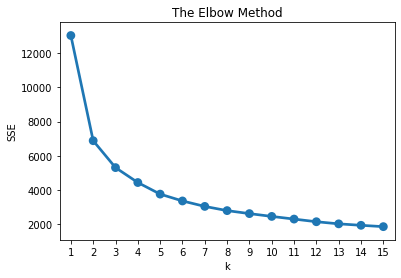

In [39]:
sse = {}
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

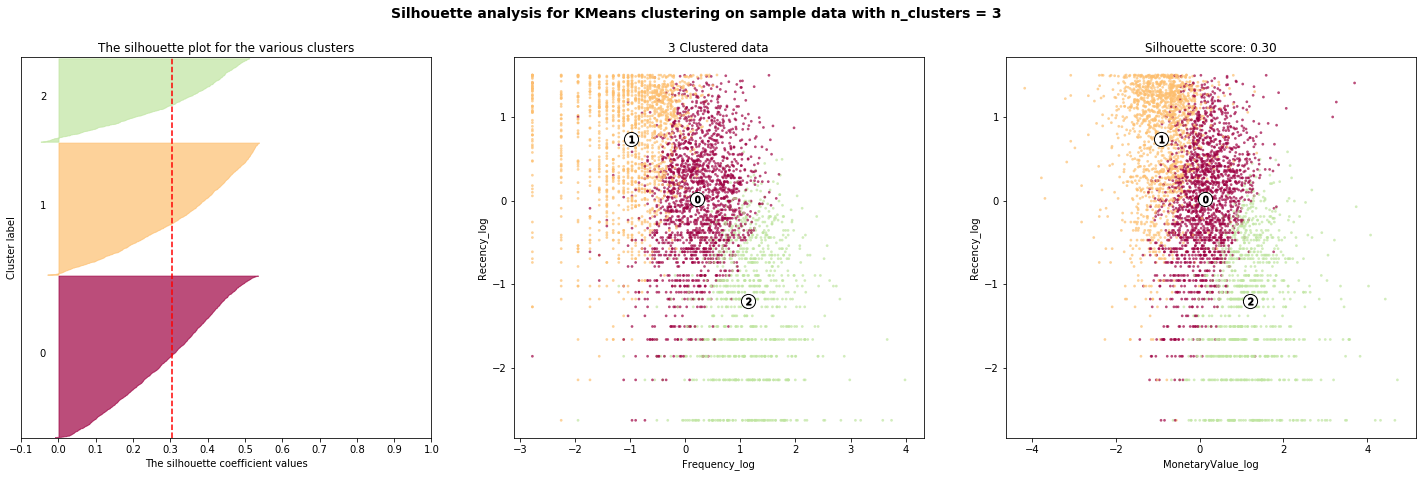

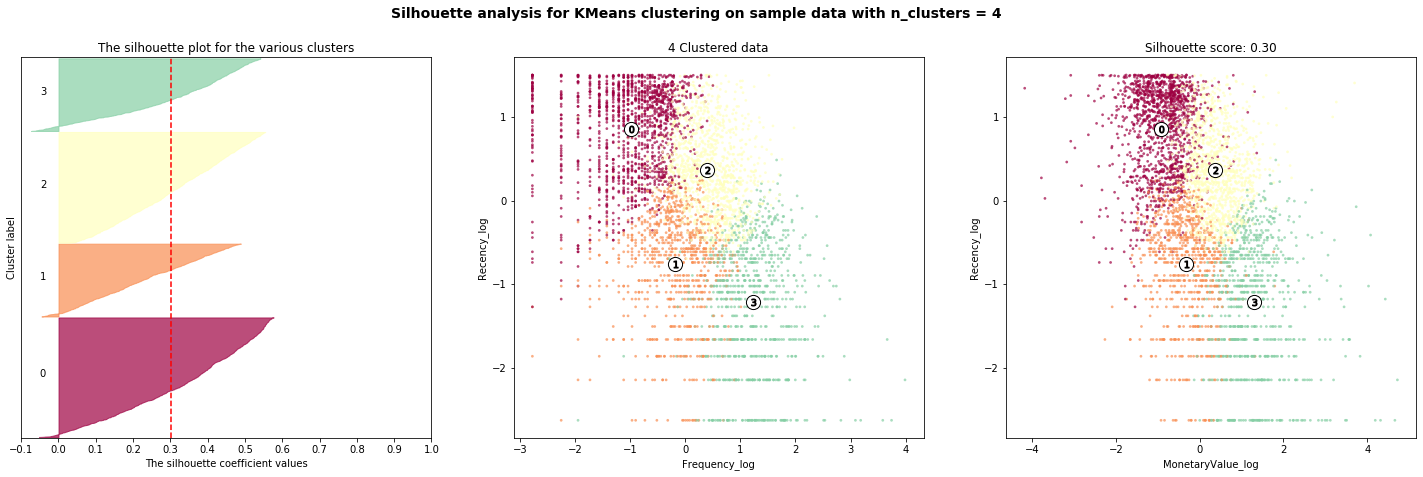

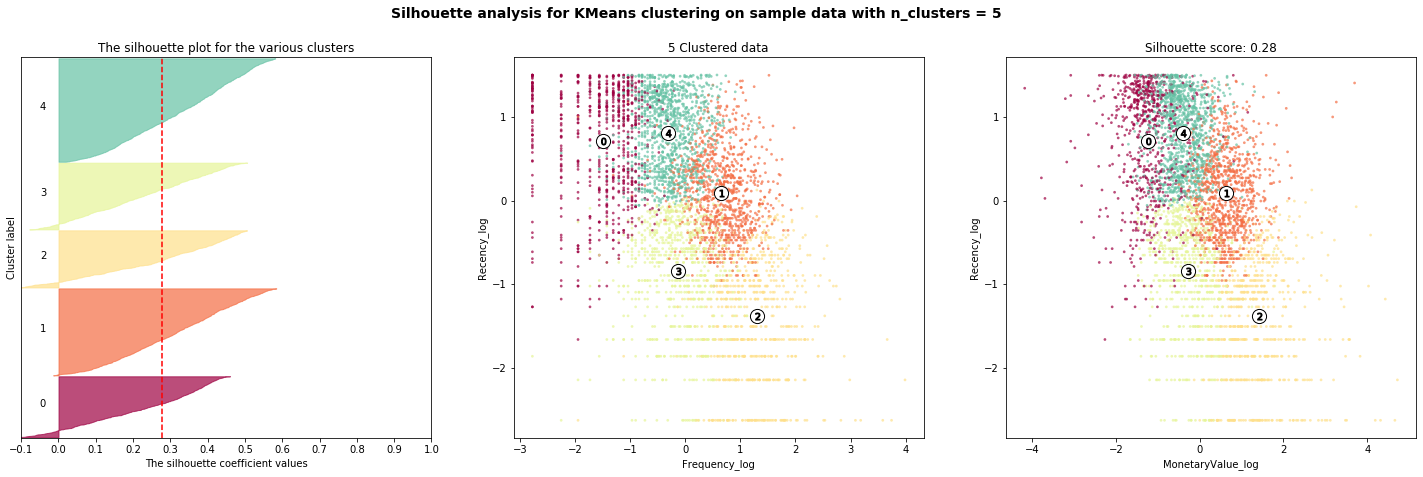

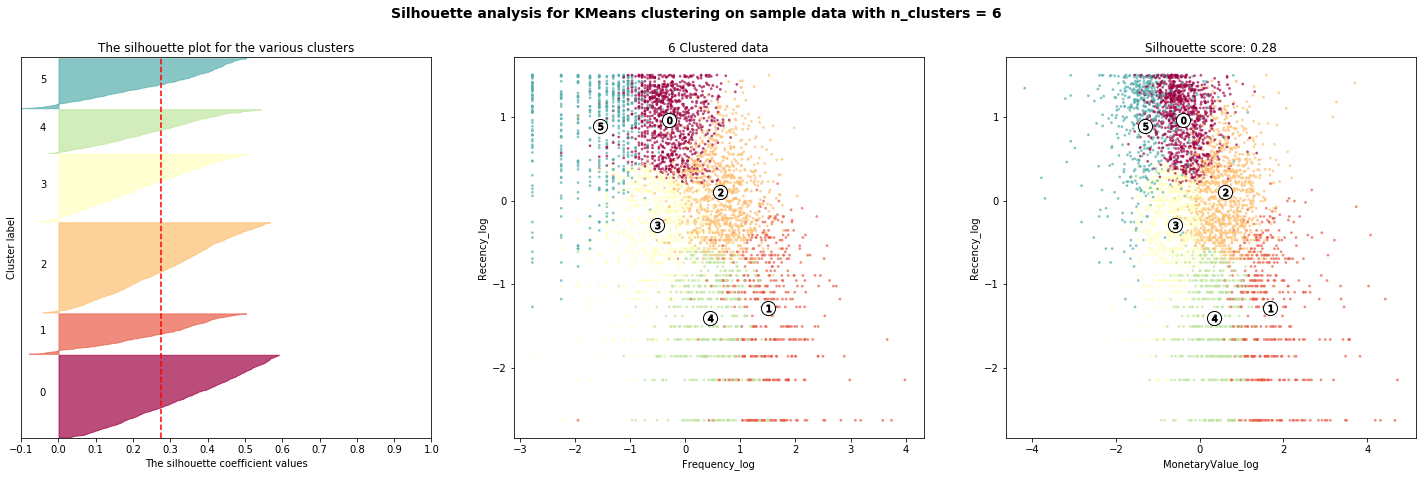

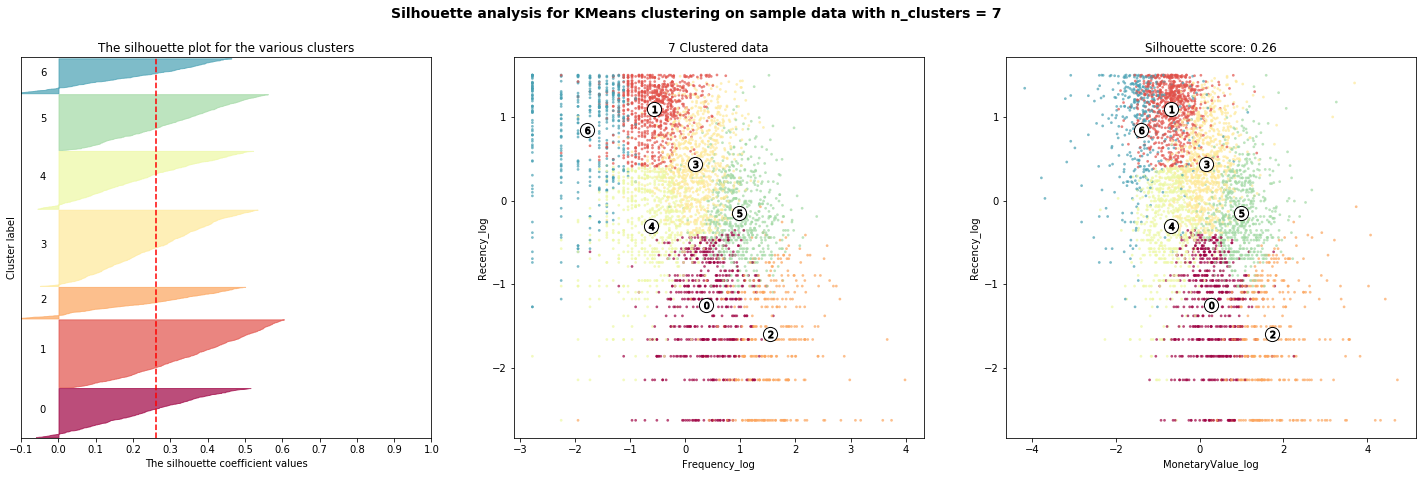

In [55]:
cluster_centers = dict()
feature_name = ['Recency_log','Frequency_log', 'MonetaryValue_log']
for n_clusters in range(3,8,1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(feature_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(feature_scaled)

    silhouette_avg = silhouette_score(X = feature_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = feature_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(feature_scaled[:, x], feature_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_name[x])
    ax2.set_ylabel(feature_name[y])

    x = 2
    ax3.scatter(feature_scaled[:, x], feature_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_name[x])
    ax3.set_ylabel(feature_name[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [56]:
model2 = KMeans(n_clusters=3, random_state=42)
model2.fit(feature_scaled)
model2.labels_.shape

(4338,)

In [57]:
rfm['Labels']= model2.labels_
rfm.sort_values(by='Frequency_log', ascending=False)

Recency  Frequency  MonetaryValue  Recency_log  Frequency_log  \
CustomerID                                                                  
17841             2       7847       40991.57     0.693147       8.967887   
14911             1       5675      143825.06     0.000000       8.643826   
14096             4       5111       65164.79     1.386294       8.539150   
12748             1       4595       33719.73     0.000000       8.432724   
14606             1       2700       12156.65     0.000000       7.901007   
...             ...        ...            ...          ...            ...   
17846            85          1        2033.10     4.442651       0.000000   
13017             7          1         204.00     1.945910       0.000000   
13099            99          1         207.36     4.595120       0.000000   
13106           133          1          76.50     4.890349       0.000000   
12346           326          1       77183.60     5.786897       0.000000   

            MonetaryValue_log  Labels  
CustomerID                             
17841               10.621122       0  
14911               11.876353       0  
14096               11.084675       0  
12748               10.425838       0  
14606                9.405632       0  
...                       ...     ...  
17846                7.617317       1  
13017                5.318120       1  
13099                5.334456       1  
13106                4.337291       1  
12346               11.253942       2  

[4338 rows x 7 columns]

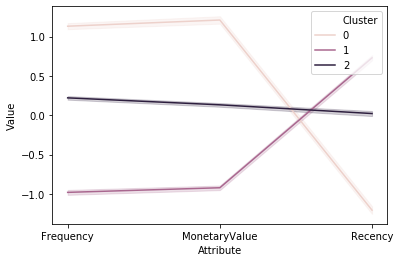

In [58]:
rfm.reset_index(inplace=True)
df_labels = pd.DataFrame(feature_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_labels['ID'] = rfm.index
df_labels['Cluster'] = model2.labels_
# Melt The Data
df_nor_melt = pd.melt(df_labels.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(feature_scaled, labels)